# Recurrent Neural Network

This notebook will demonstrate a step-by-step understanding of a Recurrent Neural Network (RNN). In particular, we will be focussing on the implementation of a RNN in **PyTorch** for classification and regression tasks.

## Intuition (Visual)

<div>
<img src="https://blog.floydhub.com/content/images/2019/04/Slide3-1.jpg" width="750"/>
</div>

## Intuition (Theoretical)

### Summary

- A recurrent neural network (RNN) is an artificial neural network (ANN), wherein connections between can form a cycle, allowing output from some nodes to affect subsequent input to the same nodes. This allows it to exhibit temporal dynamic behaviour.
- RNNs do not consume all the input data at once, unlike FFNNs. Instead, they take them in one at a time and in a sequence. At each step, the RNN does a series of calculations before producing an output. The output, known as the hidden state, is then combined with the next input in the sequence to produce another output. This process continues until the model is programmed to finish or the input sequence ends.
- While traditional deep neural networks assume that inputs and outputs are independent of each other, the output of recurrent neural networks depend on the prior elements within the sequence. 
- While feedforward networks have different weights across each node, recurrent neural networks share the same weight parameter within each layer of the network. 
- Recurrent neural networks leverage backpropagation through time (BPTT) algorithm to determine the gradients. BPTT differs from the traditional approach in that BPTT sums errors at each time step whereas feedforward networks do not need to sum errors as they do not share parameters across each layer.

### Extra

<div>
<img src="https://blog.floydhub.com/content/images/2019/04/rnn-2.gif" width="500"/>
</div>

- The calculations at each time step consider the context of the previous time steps in the form of the hidden state. Being able to use this contextual information from previous inputs is the key essence to RNNs’ success in sequential problems.
- While it may seem that a different RNN cell is being used at each time step in the graphics, the underlying principle of Recurrent Neural Networks is that the RNN cell is actually the exact same one and reused throughout.

<div>
<img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ba/82/types-of-recurrent-neural-networks-combined.component.simple-narrative-xl-retina.ts=1681483684972.jpg/content/adobe-cms/us/en/topics/recurrent-neural-networks/jcr:content/root/table_of_contents/body/simple_narrative_1474352927/image" width="750"/>
</div>

There are different types of RNNs:

- One-to-one: A simple neural network - it is commonly used for machine learning problems that have a single input and output.
- One-to-many: A single input and multiple outputs - this is used for generating image captions.
- Many-to-one: A sequence of multiple inputs and predicts a single output - it is popular in sentiment classification, where the input is text and the output is a category.
- Many-to-many: Multiple inputs and outputs - the most common application is machine translation.

<div>
<img src="https://blog.floydhub.com/content/images/2019/04/rnn-bptt-with-gradients.png" width="500"/>
</div>

For simple RNN models, there are two major issues:

- Vanishing Gradient: Occurs when the gradient becomes so small that updating parameters becomes insignificant; eventually the algorithm stops learning.
- Exploding Gradient: Occurs when the gradient becomes too large, which makes the model unstable. In this case, larger error gradients accumulate, and the model weights become too large. This issue can cause longer training times and poor model performance.

<div>
<img src="https://images.datacamp.com/image/upload/v1647442110/image6_f6vds6.png" width="500"/>
<br>
<img src="https://miro.medium.com/v2/resize:fit:1400/1*yBXV9o5q7L_CvY7quJt3WQ.png" width="500"/>
</div>

### BiDirectional RNN

**Context:**

A Bidirectional RNN (BiRNN) is a type of RNN that is designed to overcome the limitation of a vanilla RNN, which can only take into account historical context. It involves duplicating the first recurrent layer in the network so that there are now two layers side-by-side, then providing the input sequence as input to the first layer and providing a reversed copy of the input sequence to the second. This way, the BiRNN can gather information from the past (backward states) and future (forward states) states simultaneously. For example, think about *feeling under the weather* - the model can better predict that the second word in that phrase is *under* if it knew that the last word in the sequence is *weather*.

**Theoretical:**


Let $X = \left(x_{1}, x_{2}, ..., x_{T}\right)$ be a sequence of inputs. The hidden states of a standard RNN are calculated as:

$$h_{t} = \sigma(W^{hx} x_t + W^{hh} h_{t-1} + b_{h})$$

where $W^{hx}$ is the weight matrix for the inputs $x_{t}$, $W^{hh}$ is the weight matrix for the previous hidden state $h_{t-1}$, $b_h$ is the bias, and $\sigma$ is the activation function (like the hyperbolic tangent function).

In a BiRNN, the forward hidden states $\overrightarrow{h_{t}}$ and the backward hidden states $overleftarrow{h_{t}}$ are calculated as follows:

For the forward pass:

$$\overrightarrow{h_{t}} = \sigma(W^{hx_{\rightarrow}} x_{t} + W^{hh_{\rightarrow}} \overrightarrow{h_{t-1}} + b_{h_{\rightarrow}})$$

For the backward pass:

$$\overleftarrow{h_{t}} = \sigma(W^{hx_{\leftarrow}} x_t + W^{hh_{\leftarrow}} \overleftarrow{h_{t+1}} + b_{h_{\leftarrow}})$$

where $W^{hx_{\rightarrow}}$, $W^{hh_{\rightarrow}}$, $b_{h_{\rightarrow}}$, $W^{hx_{\leftarrow}}$, $W^{hh_{\leftarrow}}$, $b_{h_{\leftarrow}}$ are separate parameters for the forward and backward passes.

Finally, the outputs $y_{t}$ of the BiRNN at each time step are calculated based on the forward and backward hidden states:

$$y_t = \sigma(W^{hy_{\rightarrow}} \overrightarrow{h_{t}} + W^{hy_{\leftarrow}} \overleftarrow{h_{t}} + b_{y})$$

where $W^{hy_{\rightarrow}}$, $W^{hy_{\leftarrow}}$, $b_{y}$ are the parameters for the output. 


### Long Short-Term Memory

**Context:**

Long Short-Term Memory (LSTM) units are a modification of standard RNNs, which allows them to better capture long-term dependencies and mitigate issues like vanishing or exploding gradients. An LSTM unit achieves this with the help of a more complex internal structure compared to a standard RNN unit.

Each LSTM unit consists of a cell (which can be thought of as the *memory* of the unit) and three *gates* that control the flow of information into and out of the cell. These gates are:

- Forget Gate: This gate decides what information to discard from the cell state. It's called the forget gate because it determines what part of the previous state should be forgotten.
- Input Gate: This gate updates the cell state with new information. It has two parts - a $sigmoid$ layer called the "input gate layer" which decides which values to update, and a $tanh$ layer which creates a vector of new candidate values that could be added to the state.
- Output Gate: This gate decides what the next hidden state should be.

**Theoretical:**

Denote the cell state at time step $t$ as $C_{t}$ and hidden state as $h_{t}$. The LSTM unit takes as input $x_{t}$, as well as the previous hidden state $h_{t-1}$ and cell state $C_{t-1}$:

- The forget gate is defined as: $$ f_{t} = \sigma \left(W_{f} \cdot [h_{t-1}, x_{t}] + b_{f}\right) $$

- The input gate updates the cell state: 
$$ i_{t} = \sigma \left(W_{i} \cdot [h_{t-1}, x_{t}] + b_{i}\right) $$
$$ \tilde{C}_{t} = \tanh \left(W_{C} \cdot [h_{t-1}, x_{t}] + b_{C}\right) $$

- The old cell state $C_{t-1}$ is updated to the new cell state $C_{t}$: $$ C_{t} = f_{t} * C_{t-1} + i_{t} * \tilde{C}_{t} $$

- The output gate decides what the next hidden state should be:
$$ o_{t} = \sigma \left(W_{o} \cdot [h_{t-1}, x_{t}] + b_{o}\right) $$
$$ h_{t} = o_{t} * \tanh \left(C_{t}\right) $$



### Gated Recurrent Units

**Context:**

Gated Recurrent Units (GRUs) are a variant of LSTM units, designed to be simpler and more efficient. They have a similar goal as LSTMs — to keep or forget information selectively — but achieve this with a simpler structure.

In a GRU, the cell state and the hidden state are merged into a single state, and it uses two gates:

- Update Gate ($z$): It's similar to the combination of the forget and input gates in an LSTM. It decides what to keep and what to throw away from the state.
- Reset Gate ($r$): It's used to decide how much of the past information to forget.

**Theoretical:**

Denote $h_{t}$ is the hidden state, $x_{t}$ as input and $\left[h_{t-1}, x_{t}\right]$ as the concatenation of the hidden and input state, at time step $t$:

- The update gate is calculated as: $$ z_{t} = \sigma \left(W_{z} \cdot [h_{t-1}, x_{t}] + b_{z} \right) $$
   
- The reset gate is calculated as: $$ r_{t} = \sigma \left(W_{r} \cdot [h_{t-1}, x_{t}] + b_{r} \right) $$

- The hidden state is updated as: $$ \tilde{h}_{t} = \tanh \left(W \cdot [r_{t} * h_{t-1}, x_{t}] + b \right) $$

- The final hidden state is a combination of the previous hidden state and the candidate hidden state: $$ h_{t} = \left(1 - z_{t}\right) * h_{t-1} + z_{t} * \tilde{h}_t $$


## Code

In [1]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Since we are using ```torch```, try not to mix ```numpy``` into any calculation or dataset conversions. Additionally, check if you have access to ```GPU``` via ```torch.cuda.is_available()```. To use GPU, apply ```torch.device("cuda" if torch.cuda.is_available() else "cpu")```.

### 1. Load Dataset

- For this example we will be looking at famous Mastercard Stock dataset (for regression).
- This dataset is readily available via Kaggle ([MasterCard](https://www.kaggle.com/datasets/kalilurrahman/mastercard-stock-data-latest-and-updated?select=Mastercard_stock_history.csv)).
- If so, it can be useful to store the data similarly to the way that *torch* does it.

In [2]:
# Load data
df = pd.read_csv("Mastercard_stock_history.csv", index_col="Date", parse_dates=["Date"]).drop(["Dividends", "Stock Splits"], axis=1)
df

,Open,High,Low,Close,Volume
Date,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000
...,...,...,...,...,...
2021-10-05,347.121403,348.130138,342.497241,342.776886,4724100
2021-10-06,339.580960,348.439763,338.682072,348.250000,3712000
2021-10-07,349.000000,357.899994,349.000000,353.910004,3209200


In [3]:
# Check for NaNs and missing data/duplicates
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

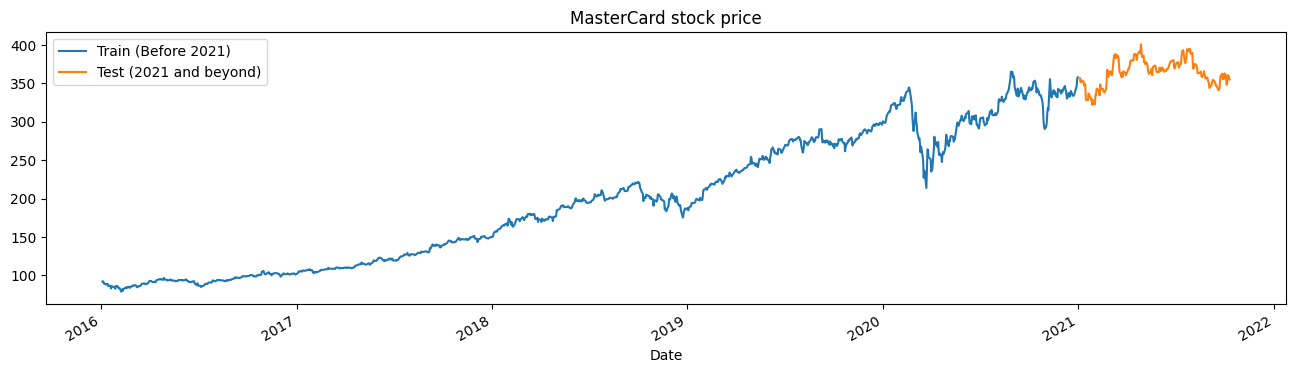

,High
Date,
2006-05-25,4.283869
2006-05-26,4.348058
2006-05-30,4.184330
2006-05-31,4.219679
2006-06-01,4.474572
...,...
2021-10-05,348.130138
2021-10-06,348.439763
2021-10-07,357.899994


In [4]:
# Plot train and test dataset 

def train_test_plot(dataset: pd.DataFrame, tstart: int, tend: int):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("MasterCard stock price")
    plt.show()

train_test_plot(dataset=df,tstart=2016,tend=2020)
pd.DataFrame(df['High'])


In [5]:
# Obtain dataset split
def data_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "High"].values
    test = dataset.loc[f"{tend+1}":, "High"].values
    return train, test
training_set, test_set = data_split(dataset=df,tstart=2016,tend=2020)

In [6]:
# Scale training dataset
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set = sc.fit_transform(training_set)
# Transform test dataset
test_set = test_set.reshape(-1, 1)
test_set = sc.transform(test_set)

Let’s focus on the High column as we are going to use it to train the model - it makes more sense (than Close or Open) as it provides us information of how high the values of the share went on the given day. The minimum stock price is $4.10$, and the highest is $400.5$. The mean is at $105.9$ and the standard deviation $107.3$, which means that stocks have high variance.

### 2. Process Data

- Depending on if you are loading the data or creating the data yourself, you may need to clean the data so that the model can use it. This is perhaps the most trickiest part throughout a Data Science/Machine Learning pipeline.
- In this case, it is good to make *batches* of the dataset so that we can manipulate the way the data is being trained e.g. allow shuffling when training per epoch etc...
- Given that this is a sequential learning problem, the training and validation process is different to the traditional machine learning method. Here, we do not want to shuffle the dataset as we do not want cross validation between past and future dates i.e. data leakage.

In [7]:
# Create dataset from the high column
def split_sequence(sequence, n_steps):
    X = np.array([sequence[i:i+n_steps] for i in range(len(sequence) - n_steps)])
    y = np.array([sequence[i+n_steps] for i in range(len(sequence) - n_steps)])
    return torch.tensor(X), torch.tensor(y)

In [8]:
# Create training and validation dataset
n_steps = 3
batch_size = 10
X, y = split_sequence(sequence=training_set, n_steps=n_steps)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
val_dataset = torch.utils.data.TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

/var/folders/lk/nt7ymd8953j6ryfm2zmz2g740000gn/T/ipykernel_3414/3477559225.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
/var/folders/lk/nt7ymd8953j6ryfm2zmz2g740000gn/T/ipykernel_3414/3477559225.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_dataset = torch.utils.data.TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))


In [9]:
# Create test dataset
X_test, y_test = split_sequence(sequence=test_set, n_steps=n_steps)
test_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

/var/folders/lk/nt7ymd8953j6ryfm2zmz2g740000gn/T/ipykernel_3414/1983514634.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))


For sequential problems, we have input as ```[batch size, length of input, target]```, which is different to FFNN and CNN. The input dimension is with respect to each time step and is constant.

### 3. Create Model

- Once the data is ready, we can now look to choose what kind of model we want to create.
- For this notebook, we will implement a RNN, LSTM and GRU. Other models exist e.g. Convolutional Neural Network (CNN) etc...

In [10]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        # Layer dimensions
        self.layer_dim = layer_dim
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu')
        # Output layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initial hidden state
        h_0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)
        # Backpropagation Through Time (detach the hidden state)
        out, _ = self.rnn(x, h_0.detach())
        # Output (Shape: [batch_size, seq_length, hidden_size])
        out = self.fc(out[:, -1, :]) 
        return out

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim

        # Building your LSTM
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # 28 time steps
        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        # out.size() --> 100, 28, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out

### 4. Instantiate Model Class

- Now the architecture and data are in the correct form, we can being initialise our class.
- Once this is complete, we can begin training.
- We may run into some errors from time to time - this usually occurs because of incompatible dimensions or incorrect data types so be sure to fix these.

In [11]:
# Create model
model = RNNModel(input_dim=1, hidden_dim=10, layer_dim=1, output_dim=1)

### 5. Instantiate Optimiser and Loss Function

- In order to update our weights (to find the optimal ones) and track the model performance, we need to choose an optimiser and loss function.
- The loss function is typically straightforward (as it depends on the machine learning task) however there are a plethora of optimisers you could use e.g. SGD, Adam etc... Usually this is a trial and error choice to find the *best* one.

In [12]:
# Instantiate loss function
loss_fn = nn.MSELoss()
# Instantiate optimiser
opt = torch.optim.Adam(params=model.parameters())

It is important to recognise that ```model.parameters()``` are the parameters that we wish to update/optimise. If these are not correctly defined in the ```__init__```, then the network may not be fully functional.

### 6. Model Training

- We are now ready to train the model.
- Through training, it is also useful to record some metrics to see how the model is performing.
- We use the loss of model to dictate potential *early stopping* of the model (although we could use other measures as well) i.e. if the model loss starts increasing after it has decreased, we are potentially overfitting and so should stop training and keep the model at that instance. This can be applied per ```epoch``` or at some multiple of ```n_iters```.
- When evaluating the model, it is necessary to apply ```model.eval()``` along with ```torch.no_grad()``` and once this is complete, to apply ```model.train()``` after if the model architecture includes layers of ```dropout```, ```batch_normalisation``` etc...
- The training and evaluation phase below is a generalised architecture; there are other variations of this which you may want to experiment with!

In [13]:
# Calculate number of epochs
n_iters = 15000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

In [14]:
# Initialize the early stopping parameters
best_val_loss = float("inf")
patience = 3
epochs_no_improve = 0
early_stop = False

In [15]:
# Train model
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    # Initialise training loss
    train_loss = 0
    # Iterate through entire collection (per batch)
    for seq, targets in train_loader:
        # Clear gradients with respect to parameters
        opt.zero_grad()
        # Forward pass
        outputs = model(seq)
        # Calculate loss
        loss = loss_fn(outputs, targets)
        # Accumulate loss
        train_loss += loss.item()
        # Backward pass
        loss.backward()
        # Parameter update
        opt.step()
    # Store information
    train_losses.append(train_loss)
    # Evaluate model (NOTE: In the evaluation phase, the model parameters do not need updating!)
    with torch.no_grad():
        # Initialise validation loss
        val_loss = 0
        # Iterate through entire collection (per batch)for inputs, labels in test_loader:
        for seq, targets in val_loader:
            # Forward pass
            outputs = model(seq)
            # Calculate loss
            loss = loss_fn(outputs, targets)
            # Accumulate loss
            val_loss += loss.item()
        # Store information
        val_losses.append(val_loss)
        # Print loss and accuracy
        print(
            f"Epoch: {epoch} | Validation loss: {val_loss} | Validation MSE: {val_loss}"
        )
        # If the validation loss is at a new minimum, save the model
        if val_loss < best_val_loss:
            torch.save(model.state_dict(), "best_model.pth")
            best_val_loss = val_loss
            epochs_no_improve = 0
        # If the validation loss is not improving for certain patience, stop training!
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                early_stop = True
                break

Epoch: 0 | Validation loss: 0.14777336626139004 | Validation MSE: 0.14777336626139004
Epoch: 1 | Validation loss: 0.176381959579885 | Validation MSE: 0.176381959579885
Epoch: 2 | Validation loss: 0.08366034715436399 | Validation MSE: 0.08366034715436399
Epoch: 3 | Validation loss: 0.05645351664861664 | Validation MSE: 0.05645351664861664
Epoch: 4 | Validation loss: 0.04028601149911992 | Validation MSE: 0.04028601149911992
Epoch: 5 | Validation loss: 0.03851499324082397 | Validation MSE: 0.03851499324082397
Epoch: 6 | Validation loss: 0.039306254184339195 | Validation MSE: 0.039306254184339195
Epoch: 7 | Validation loss: 0.0392767776211258 | Validation MSE: 0.0392767776211258
Epoch: 8 | Validation loss: 0.0384157226071693 | Validation MSE: 0.0384157226071693
Epoch: 9 | Validation loss: 0.03666491649346426 | Validation MSE: 0.03666491649346426
Epoch: 10 | Validation loss: 0.0346157334279269 | Validation MSE: 0.0346157334279269
Epoch: 11 | Validation loss: 0.032735744200181216 | Validatio

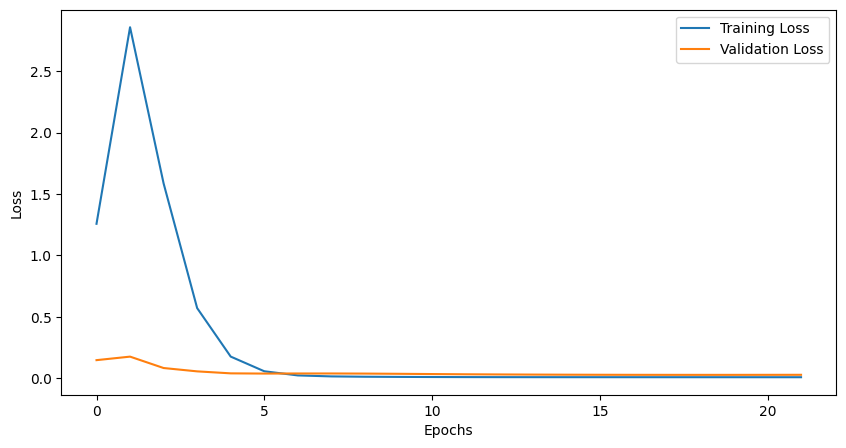

In [16]:
# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

If the validation loss is displaying ```inf```, then something has gone wrong with the data or the model - debug the code to check which! 

In [17]:
# Load saved model
model.load_state_dict(torch.load("best_model.pth"))

<All keys matched successfully>

### 7. Model Testing

- Now that the model has been trained and evaluated, we can test the optimal model on unseen data.
- This is a crucial part as it shows whether or not the model is generalisable i.e. has low variance.

In [18]:
# Test model
test_loss = 0
pred = []
for seq, targets in test_loader:
    # Forward pass
    outputs = model(seq)
    # Re-transform data
    pred.append(sc.inverse_transform(outputs.detach().numpy()).tolist())
    # Calculate loss
    loss = loss_fn(outputs, targets)
    # Accumulate loss
    test_loss += loss.item()
# Return metric
pred = np.array([item for sublist in pred for item in sublist])
print(f"Test MSE: {test_loss}")

Test MSE: 0.02587369250250049


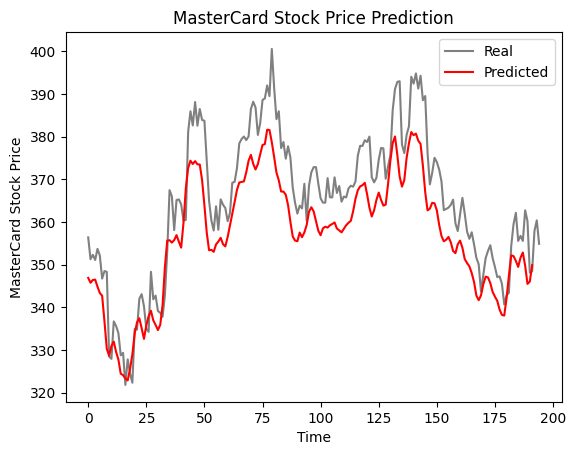

In [19]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()
plot_predictions(test=sc.inverse_transform(test_set), predicted=pred)

## Final Remarks

Thank you for reading this notebook. Note that there are other implementations of recurrent neural networks (which I would advise you to take a look at to see any differences of similarities with this version).
If there are any mistakes or things that need more clarity, feel free to respond and I will be happy to reply 😊.

© *PolyNath 2023*